In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
fear_greed = pd.read_excel('/content/drive/MyDrive/fear_greed_index.xlsx')
historical = pd.read_excel('/content/drive/MyDrive/historical_data.xlsx')

-- EDA greed dataset

In [4]:
print(fear_greed.head(2))

    timestamp  value classification       date
0  1517463000     30           Fear 2018-02-01
1  1517549400     15   Extreme Fear 2018-02-02


In [5]:
fear_greed.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0


In [6]:
fear_greed['date'].dtype

dtype('<M8[ns]')

In [7]:
fear_greed.duplicated().sum()

np.int64(0)

In [8]:
fear_greed['date']=pd.to_datetime(fear_greed['date']).dt.normalize()

In [9]:
fear_greed['date'].dtype

dtype('<M8[ns]')

In [10]:
#important column
fear_greed = fear_greed[['date','classification']]

In [11]:
fear_greed.shape

(2644, 2)

In [12]:
fear_greed.head(2)

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear


EDA on historical data

In [13]:
historical.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,1730000000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,1730000000000


In [14]:
historical.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [15]:
historical.duplicated().sum()

np.int64(0)

In [16]:
historical['Timestamp IST'] = pd.to_datetime(historical['Timestamp IST'])

historical['date'] = pd.to_datetime(historical['Timestamp IST']).dt.normalize()

historical['date'] = pd.to_datetime(historical['date'])

historical['date'].dtype

dtype('<M8[ns]')

In [17]:
historical.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,895000000000000,1730000000000,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,443000000000000,1730000000000,2024-12-02


In [18]:
historical.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date'],
      dtype='object')

In [19]:
historical = historical[['Account','Coin','Size USD','Side','Start Position','Fee', 'Direction', 'Closed PnL', 'date']]

In [20]:
historical.shape

(211224, 9)

In [21]:
historical.head(2)

,Account,Coin,Size USD,Side,Start Position,Fee,Direction,Closed PnL,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7872.16,BUY,0.000000,0.345404,Buy,0.0,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,127.68,BUY,986.524596,0.005600,Buy,0.0,2024-12-02


Merging and creating new df

In [22]:
df = pd.merge(historical, fear_greed, on='date', how='left')

In [23]:
df.head(2)

,Account,Coin,Size USD,Side,Start Position,Fee,Direction,Closed PnL,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7872.16,BUY,0.000000,0.345404,Buy,0.0,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,127.68,BUY,986.524596,0.005600,Buy,0.0,2024-12-02,Extreme Greed


In [24]:
df.shape

(211224, 10)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Account         211224 non-null  object        
 1   Coin            211224 non-null  object        
 2   Size USD        211224 non-null  float64       
 3   Side            211224 non-null  object        
 4   Start Position  211224 non-null  float64       
 5   Fee             211224 non-null  float64       
 6   Direction       211224 non-null  object        
 7   Closed PnL      211224 non-null  float64       
 8   date            211224 non-null  datetime64[ns]
 9   classification  211218 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 16.1+ MB


In [26]:
df['Side'].value_counts()

,count
Side,
SELL,108528
BUY,102696


In [27]:
df.isnull().sum()

,0
Account,0
Coin,0
Size USD,0
Side,0
Start Position,0
Fee,0
Direction,0
Closed PnL,0
date,0
classification,6


In [28]:
df = df.dropna(subset = ['classification'])

In [29]:
df.isnull().sum()

,0
Account,0
Coin,0
Size USD,0
Side,0
Start Position,0
Fee,0
Direction,0
Closed PnL,0
date,0
classification,0


In [30]:
df.describe()

,Size USD,Start Position,Fee,Closed PnL,date
count,2.112180e+05,2.112180e+05,211218.000000,211218.000000,211218
mean,5.639192e+03,-2.994671e+04,1.163960,48.549304,2025-01-30 23:58:26.735221248
min,0.000000e+00,-1.433463e+07,-1.175712,-117990.104100,2023-05-01 00:00:00
25%,1.937900e+02,-3.760725e+02,0.016121,0.000000,2024-12-31 00:00:00
50%,5.970200e+02,8.477051e+01,0.089572,0.000000,2025-02-24 00:00:00
75%,2.058878e+03,9.337697e+03,0.393774,5.790132,2025-04-02 00:00:00
max,3.921431e+06,3.050948e+07,837.471593,135329.090100,2025-05-01 00:00:00
std,3.657557e+04,6.738170e+05,6.758948,917.989791,NaN


In [31]:
df.duplicated().sum()

np.int64(1)

In [32]:
df[df.duplicated(keep=False)]

,Account,Coin,Size USD,Side,Start Position,Fee,Direction,Closed PnL,date,classification
31294,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,BTC,11.19,BUY,0.0,0.003758,Open Long,0.0,2024-03-27,Extreme Greed
31296,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,BTC,11.19,BUY,0.0,0.003758,Open Long,0.0,2024-03-27,Extreme Greed


In [33]:
df = df.drop_duplicates(keep = 'first')

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# 1 daily profit and loss
pnl = df.groupby(['date','Account'])['Closed PnL'].sum().reset_index()
pnl.head(3)

,date,Account,Closed PnL
0,2023-05-01,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,0.000000
1,2023-12-05,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,0.000000
2,2023-12-14,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,-205.434737


In [37]:
#2 avg trade size
avg_trade_size = df['Size USD'].mean()
avg_trade_size

np.float64(5639.218256153623)

winning rates

In [38]:
# 3 winning trade rate
# Create a boolean column indicating if a trade was winning   r = 1s / count of rows

df['is_winning_trade'] = (df['Closed PnL'] > 0)

overall_win_rate_percentage = df['is_winning_trade'].mean() * 100
print(f"Overall winning trade percentage: {overall_win_rate_percentage:.2f}%")

Overall winning trade percentage: 41.13%


In [39]:
# 5 long short ratio

#mapping

df['map_L_s']= df['Side'].map({'BUY': 'Long' , 'SELL':'Short'})


In [40]:
df['Side'].value_counts()

,count
Side,
SELL,108528
BUY,102689


In [41]:
long_short_ratio = df.groupby(['date','map_L_s']).size().unstack(fill_value=0)

In [42]:
long_short_ratio['ratio'] = long_short_ratio['Long'] / long_short_ratio['Short']
long_short_ratio

map_L_s,Long,Short,ratio
date,,,
2023-05-01,3,0,inf
2023-12-05,7,2,3.500000
2023-12-14,5,6,0.833333
2023-12-15,2,0,inf
2023-12-16,3,0,inf
...,...,...,...
2025-04-27,209,128,1.632812
2025-04-28,652,727,0.896836
2025-04-29,1105,1138,0.971002


In [43]:
# long short ratio gives insight , in greed period exhibit a stronger long bias , but in fear periods show a more balanced position

In [44]:
3# trades / day


trades_per_day = df.groupby('date')['Account'].size().reset_index()
trades_per_day

,date,Account
0,2023-05-01,3
1,2023-12-05,9
2,2023-12-14,11
3,2023-12-15,2
4,2023-12-16,3
...,...,...
474,2025-04-27,337
475,2025-04-28,1379
476,2025-04-29,2243
477,2025-04-30,1113


In [45]:
df.head()

,Account,Coin,Size USD,Side,Start Position,Fee,Direction,Closed PnL,date,classification,is_winning_trade,map_L_s
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7872.16,BUY,0.000000,0.345404,Buy,0.0,2024-12-02,Extreme Greed,False,Long
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,127.68,BUY,986.524596,0.005600,Buy,0.0,2024-12-02,Extreme Greed,False,Long
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,1150.63,BUY,1002.518996,0.050431,Buy,0.0,2024-12-02,Extreme Greed,False,Long
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,1142.04,BUY,1146.558564,0.050043,Buy,0.0,2024-12-02,Extreme Greed,False,Long
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,69.75,BUY,1289.488521,0.003055,Buy,0.0,2024-12-02,Extreme Greed,False,Long


# Analysis



In [46]:
# Fear vs Greed

In [75]:
daily_pnl= df.groupby(['date','classification'])['Closed PnL'].mean().reset_index()
daily_pnl

,date,classification,Closed PnL
0,2023-05-01,Greed,0.000000
1,2023-12-05,Extreme Greed,0.000000
2,2023-12-14,Greed,-18.675885
3,2023-12-15,Greed,-12.316017
4,2023-12-16,Greed,0.000000
...,...,...,...
474,2025-04-27,Greed,8.018004
475,2025-04-28,Neutral,26.763462
476,2025-04-29,Greed,56.063136
477,2025-04-30,Greed,12.582028


<Axes: xlabel='classification', ylabel='Closed PnL'>

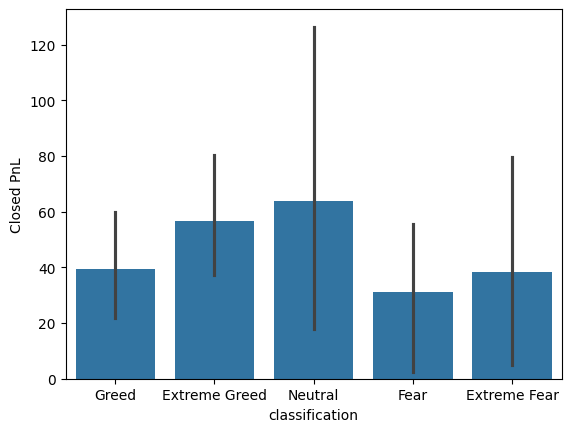

In [79]:

sns.barplot(x='classification', y='Closed PnL', data=daily_pnl)


In [48]:
fear_vs_greed = df.groupby(['date', 'classification'])['is_winning_trade'].mean().reset_index()
fear_vs_greed['winning_rate_percentage'] = fear_vs_greed['is_winning_trade'] * 100                  # Convert to percentage
fear_vs_greed

,date,classification,is_winning_trade,winning_rate_percentage
0,2023-05-01,Greed,0.000000,0.000000
1,2023-12-05,Extreme Greed,0.000000,0.000000
2,2023-12-14,Greed,0.363636,36.363636
3,2023-12-15,Greed,0.000000,0.000000
4,2023-12-16,Greed,0.000000,0.000000
...,...,...,...,...
474,2025-04-27,Greed,0.356083,35.608309
475,2025-04-28,Neutral,0.416969,41.696882
476,2025-04-29,Greed,0.432011,43.201070
477,2025-04-30,Greed,0.265049,26.504942


<Axes: xlabel='classification', ylabel='winning_rate_percentage'>

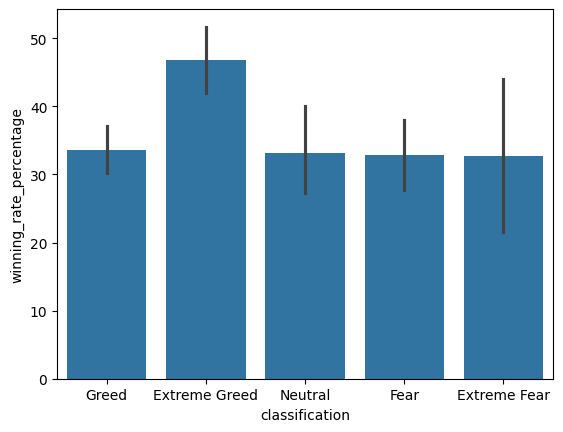

In [80]:
sns.barplot(x='classification', y='winning_rate_percentage', data=fear_vs_greed)

In [52]:
# high leverage lowlevrage traders

leverage = df['Start Position'].median()

leverage

84.77102

In [54]:
df['combined leverage'] = np.where(df['Start Position'] >= leverage, "high leverage",'low levrage')

In [56]:
df['combined leverage']

,combined leverage
0,low levrage
1,high leverage
2,high leverage
3,high leverage
4,high leverage
...,...
211219,high leverage
211220,high leverage
211221,high leverage
211222,high leverage


In [71]:
leverage_analysis = (df.groupby(['date','classification','combined leverage'])['is_winning_trade'].mean() * 100).reset_index()

In [72]:
leverage_analysis

,date,classification,combined leverage,is_winning_trade
0,2023-05-01,Greed,low levrage,0.000000
1,2023-12-05,Extreme Greed,low levrage,0.000000
2,2023-12-14,Greed,high leverage,50.000000
3,2023-12-14,Greed,low levrage,28.571429
4,2023-12-15,Greed,low levrage,0.000000
...,...,...,...,...
810,2025-04-29,Greed,low levrage,42.406542
811,2025-04-30,Greed,high leverage,36.878216
812,2025-04-30,Greed,low levrage,15.094340
813,2025-05-01,Neutral,high leverage,51.575931


<Axes: xlabel='classification', ylabel='is_winning_trade'>

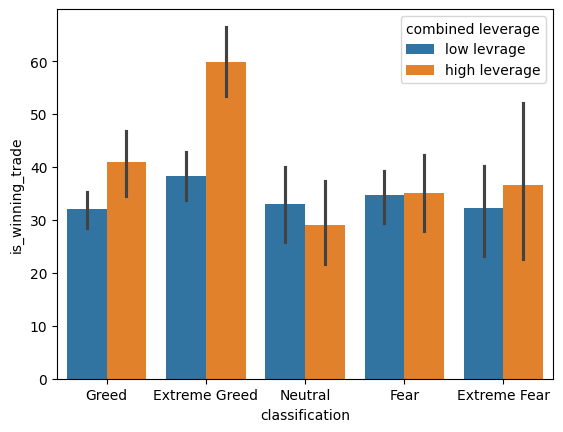

In [78]:
sns.barplot(x='classification', y='is_winning_trade', hue='combined leverage', data=leverage_analysis)